In [8]:
# !ping MONGODB

In [10]:
# !pip install mysql-connector-python

In [1]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host="mysql", # MySQL 서버 주소
        user="root",
        password="1234"
    )
    if conn.is_connected():
        print("MySQL 서버에 성공적으로 연결되었습니다.")
except mysql.connector.Error as err:
    print("MySQL 연결 실패:", err)
finally:
    if conn.is_connected():
        print("연결중...")

MySQL 서버에 성공적으로 연결되었습니다.
연결중...


In [2]:
# 커서 생성
cursor = conn.cursor()
que = "CREATE DATABASE IF NOT EXISTS judb"
cursor.execute(que)
conn.close()

In [5]:
# MySQL 에 연결
conn = mysql.connector.connect(
        host="mysql", # MySQL 서버 주소
        user="root",
        password="1234",
        database="judb" # 사용할 데이터 베이스
    )
cursor = conn.cursor()
print("MySQL 연결 성공!")

MySQL 연결 성공!


In [6]:
# 테이블 생성
query = "CREATE TABLE IF NOT EXISTS users(id INT AUTO_INCREMENT PRIMARY KEY ,name VARCHAR(50), age INT, city VARCHAR(50))"
cursor.execute(query)
print("테이블 생성완료")

테이블 생성완료


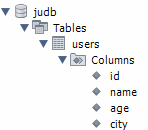

In [30]:
# 단일 데이터 삽입
sql = "INSERT INTO users (name, age, city) VALUES (%s, %s, %s)"
values = ("Alice", 25, "Seoul")
cursor.execute(sql, values)
conn.commit()
print("1개의 데이터 삽입 완료, ID:", cursor.lastrowid)

1개의 데이터 삽입 완료, ID: 5


In [34]:
# 모든 데이터 조회
que = "SELECT * FROM users"
cursor.execute(que)
users = cursor.fetchall()
# print(users)
for user in users:
    print(user)

(1, 'Alice', 19, 'Seoul')
(2, 'superman', 33, 'Busan')
(3, 'Cutegirl', 17, 'Incheon')
(5, 'Alice', 25, 'Seoul')
(6, 'superman', 33, 'Busan')
(7, 'Cutegirl', 17, 'jeju')


In [31]:
# 여러개의 데이터 삽입
m_values=[("superman",33,"Busan"),("Cutegirl",17,"jeju"),("Coolboy",22,"Jeju")]
cursor.executemany(sql, m_values)
conn.commit()
print("여러개의 데이터 삽입 완료!")

여러개의 데이터 삽입 완료!


In [19]:
# 특정 조건 데이터 조회( 24살 이상만 조회)
que = "SELECT * FROM users"
filters = " WHERE age >= 24"
cursor.execute(que + filters)

filtered = cursor.fetchall()
for f in filtered:
    print(f)

(2, 'superman', 33, 'Busan')


In [18]:
# 특정 사용자의 나이 수정
sql = "UPDATE users SET age = %s WHERE name = %s"
values = (19, "Alice")
cursor.execute(sql, values)
conn.commit()
print("수정된 행 개수:", cursor.rowcount)

수정된 행 개수: 1


In [35]:
# 특정 조건 사용자 삭제
que = "DELETE FROM users WHERE age > %s AND city = %s"
filters = (20 , "jeju")
cursor.execute(que , filters)
conn.commit()
print(f"{filters}에 해당하는 목록을 삭제하였습니다." )

(20, 'jeju')에 해당하는 목록을 삭제하였습니다.
